## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.feature_selection import RFECV as RFECV_SKLEARN
from yellowbrick.features import RFECV

## Dataset

### Lendo os arquivos

In [3]:
chuva = pd.read_csv('rain_data_aus.csv')

In [4]:
vento_1 = pd.read_csv('wind_table_01.csv', names = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'], skiprows = [0])
vento_2 = pd.read_csv('wind_table_02.csv', names = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'], skiprows = [0])
vento_3 = pd.read_csv('wind_table_03.csv', names = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'], skiprows = [0])
vento_4 = pd.read_csv('wind_table_04.csv', names = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'], skiprows = [0])
vento_5 = pd.read_csv('wind_table_05.csv', names = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'], skiprows = [0])
vento_6 = pd.read_csv('wind_table_06.csv', names = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'], skiprows = [0])
vento_7 = pd.read_csv('wind_table_07.csv', names = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'], skiprows = [0])
vento_8 = pd.read_csv('wind_table_08.csv', names = ['date', 'location', 'wind_gustdir', 'wind_gustspeed', 'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm'], skiprows = [0])

### Juntando os Data Sets

In [5]:
ventos = pd.concat([vento_1, vento_2, vento_3, vento_4, vento_5, vento_6, vento_7, vento_8])

In [6]:
ventos.shape

(164386, 8)

In [7]:
ventos.duplicated().sum()

22193

In [8]:
ventos.drop_duplicates(inplace =True)

In [9]:
ventos

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0
...,...,...,...,...,...,...,...,...
22188,2017-06-25,Perth,E,26.0,SE,SE,4.0,11.0
22189,2017-06-25,SalmonGums,SE,15.0,SSE,E,7.0,6.0
22190,2017-06-25,Walpole,SSW,20.0,WNW,SSW,6.0,6.0
22191,2017-06-25,Hobart,NW,50.0,NNW,NNW,17.0,28.0


In [10]:
ventos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 22192
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            142193 non-null  object 
 1   location        142193 non-null  object 
 2   wind_gustdir    132863 non-null  object 
 3   wind_gustspeed  132923 non-null  float64
 4   wind_dir9am     132180 non-null  object 
 5   wind_dir3pm     138415 non-null  object 
 6   wind_speed9am   140845 non-null  float64
 7   wind_speed3pm   139563 non-null  float64
dtypes: float64(3), object(5)
memory usage: 9.8+ MB


In [11]:
chuva = chuva.merge(ventos, on =['date', 'location'], how = 'left')

In [12]:
chuva.shape

(142193, 29)

### Análise Inicial

In [13]:
chuva.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,temp3pm,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustspeed,wind_speed9am,wind_speed3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,...,139467.000000,142193.000000,141871.000000,138583.000000,142193.000000,142193.000000,142193.000000,132923.000000,140845.000000,139563.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,68.843810,51.482606,1017.653758,1015.258204,4.437189,...,21.687235,2.360682,28.505419,61.991179,10.014164,10.000748,0.227804,39.984292,14.001988,18.637576
std,6.403283,7.117618,8.465173,4.188537,3.781525,19.051293,20.797772,7.105476,7.036677,2.887016,...,6.937594,8.477969,10.237506,26.649111,3.169832,4.997908,0.272764,13.588801,8.893337,8.803345
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,...,-5.400000,0.000000,-3.760000,2.000000,0.000000,-17.739346,0.000000,6.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,57.000000,37.000000,1012.900000,1010.400000,1.000000,...,16.600000,0.000000,22.520000,44.000000,8.000000,6.650238,0.030055,31.000000,7.000000,13.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,70.000000,52.000000,1017.600000,1015.200000,5.000000,...,21.100000,0.000000,28.520000,63.200000,10.000000,10.000009,0.100853,39.000000,13.000000,19.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,83.000000,66.000000,1022.400000,1020.000000,7.000000,...,26.400000,0.800000,35.480000,80.000000,12.000000,13.389306,0.329507,48.000000,19.000000,24.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,100.000000,100.000000,1041.000000,1039.600000,9.000000,...,46.700000,371.000000,59.720000,122.000000,26.000000,32.478590,0.999400,135.000000,130.000000,87.000000


In [14]:
chuva.describe(include = 'object')

,date,location,raintoday,raintomorrow,wind_gustdir,wind_dir9am,wind_dir3pm
count,142193,142193,140787,142193,132863,132180,138415
unique,3436,49,2,2,16,16,16
top,2013-12-01,Canberra,No,No,W,N,SE
freq,49,3418,109332,110316,9780,11393,10663


In [15]:
chuva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

### Tratando variáveis booleanas

In [16]:
chuva = pd.get_dummies(chuva, drop_first = True, columns = ['raintoday', 'raintomorrow'])

### Dados vazados

<Axes: xlabel='modelo_vigente', ylabel='humidity'>

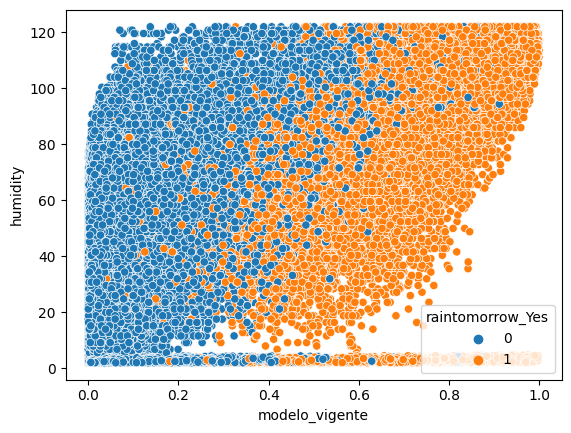

In [17]:
sns.scatterplot(x='modelo_vigente', y='humidity', hue = 'raintomorrow_Yes', data=chuva)

<Axes: xlabel='raintoday_Yes', ylabel='modelo_vigente'>

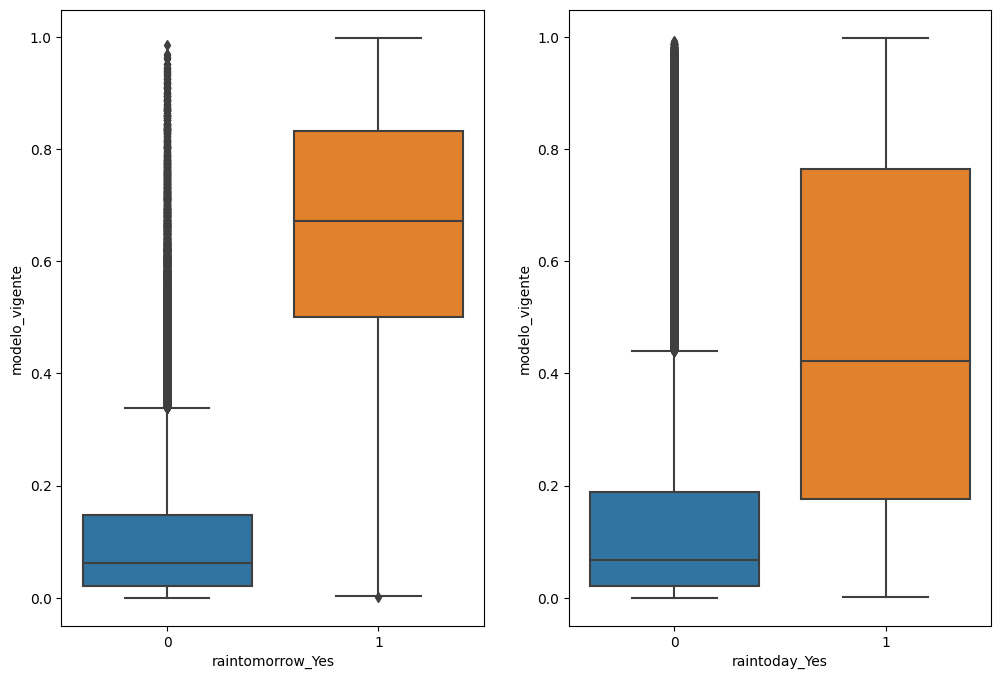

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12, 8))

sns.boxplot(x='raintomorrow_Yes', y='modelo_vigente', data=chuva, ax=ax[0])
sns.boxplot(x='raintoday_Yes', y='modelo_vigente', data=chuva, ax=ax[1])

<Axes: xlabel='amountOfRain', ylabel='humidity'>

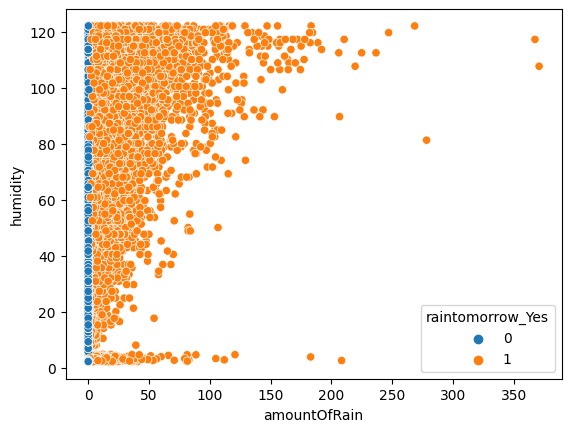

In [19]:
sns.scatterplot(x='amountOfRain', y='humidity', hue = 'raintomorrow_Yes', data=chuva)

In [20]:
chuva.drop(columns = ['modelo_vigente', 'amountOfRain'], inplace = True, axis =1)

In [21]:
chuva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  temp              141871 non-null  float64
 16  humidity          13

### Avaliando as correlações

In [22]:
chuva.corr()['raintomorrow_Yes'].sort_values(ascending = False)

/var/folders/4x/z7f3ppt51xv6ltctr39t5prh0000gn/T/ipykernel_55075/294739921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chuva.corr()['raintomorrow_Yes'].sort_values(ascending = False)


raintomorrow_Yes    1.000000
humidity3pm         0.446160
humidity            0.405600
cloud3pm            0.381870
cloud9am            0.317380
raintoday_Yes       0.306555
humidity9am         0.257161
rainfall            0.239032
wind_gustspeed      0.234010
wind_speed9am       0.090995
wind_speed3pm       0.087817
mintemp             0.083936
precipitation3pm    0.004503
precipitation9am   -0.007018
temp9am            -0.025691
evaporation        -0.119285
temp               -0.125976
maxtemp            -0.159237
temp3pm            -0.192424
pressure3pm        -0.226031
pressure9am        -0.246371
sunshine           -0.450768
Name: raintomorrow_Yes, dtype: float64

<Axes: xlabel='raintomorrow_Yes', ylabel='humidity3pm'>

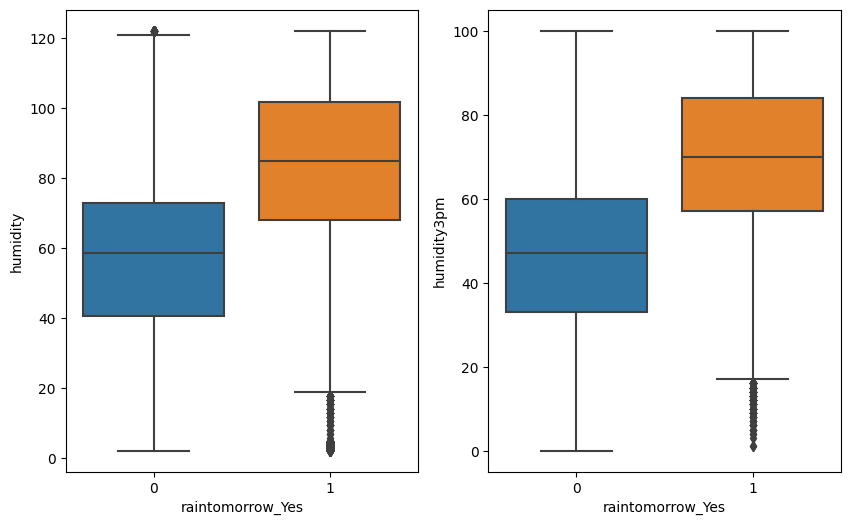

In [23]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))

sns.boxplot(x = 'raintomorrow_Yes', y = 'humidity', data = chuva, ax=ax[0])
sns.boxplot(x = 'raintomorrow_Yes', y = 'humidity3pm', data = chuva, ax=ax[1])

<Axes: xlabel='raintomorrow_Yes', ylabel='cloud9am'>

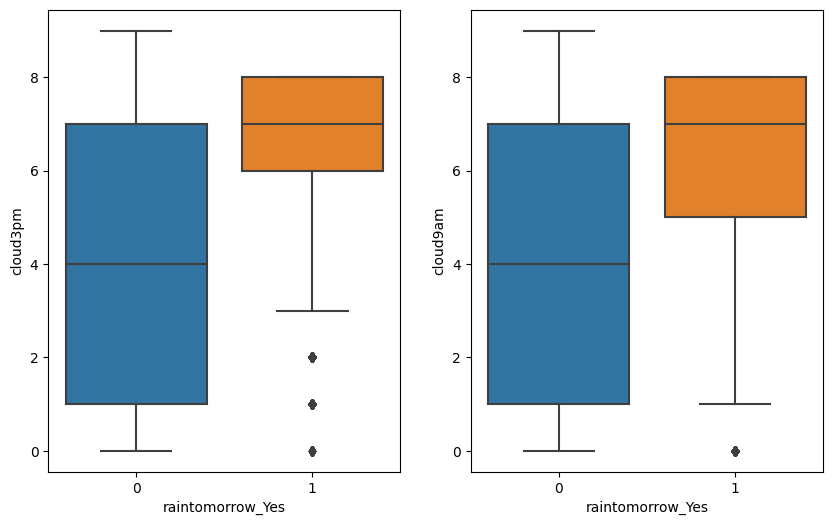

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))

sns.boxplot(x = 'raintomorrow_Yes', y = 'cloud3pm', data = chuva, ax=ax[0])
sns.boxplot(x = 'raintomorrow_Yes', y = 'cloud9am', data = chuva, ax=ax[1])

### Avaliando nulos

In [25]:
chuva.corr()['raintomorrow_Yes'].sort_values(ascending=False)

/var/folders/4x/z7f3ppt51xv6ltctr39t5prh0000gn/T/ipykernel_55075/194950294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chuva.corr()['raintomorrow_Yes'].sort_values(ascending=False)


raintomorrow_Yes    1.000000
humidity3pm         0.446160
humidity            0.405600
cloud3pm            0.381870
cloud9am            0.317380
raintoday_Yes       0.306555
humidity9am         0.257161
rainfall            0.239032
wind_gustspeed      0.234010
wind_speed9am       0.090995
wind_speed3pm       0.087817
mintemp             0.083936
precipitation3pm    0.004503
precipitation9am   -0.007018
temp9am            -0.025691
evaporation        -0.119285
temp               -0.125976
maxtemp            -0.159237
temp3pm            -0.192424
pressure3pm        -0.226031
pressure9am        -0.246371
sunshine           -0.450768
Name: raintomorrow_Yes, dtype: float64

In [26]:
dicionario = {}

for i in chuva.columns:
    dicionario[i] = sum(chuva[i].isnull())
dicionario

{'date': 0,
 'location': 0,
 'mintemp': 637,
 'maxtemp': 322,
 'rainfall': 1406,
 'evaporation': 60843,
 'sunshine': 67816,
 'humidity9am': 1774,
 'humidity3pm': 3610,
 'pressure9am': 14014,
 'pressure3pm': 13981,
 'cloud9am': 53657,
 'cloud3pm': 57094,
 'temp9am': 904,
 'temp3pm': 2726,
 'temp': 322,
 'humidity': 3610,
 'precipitation3pm': 0,
 'precipitation9am': 0,
 'wind_gustdir': 9330,
 'wind_gustspeed': 9270,
 'wind_dir9am': 10013,
 'wind_dir3pm': 3778,
 'wind_speed9am': 1348,
 'wind_speed3pm': 2630,
 'raintoday_Yes': 0,
 'raintomorrow_Yes': 0}

<Axes: >

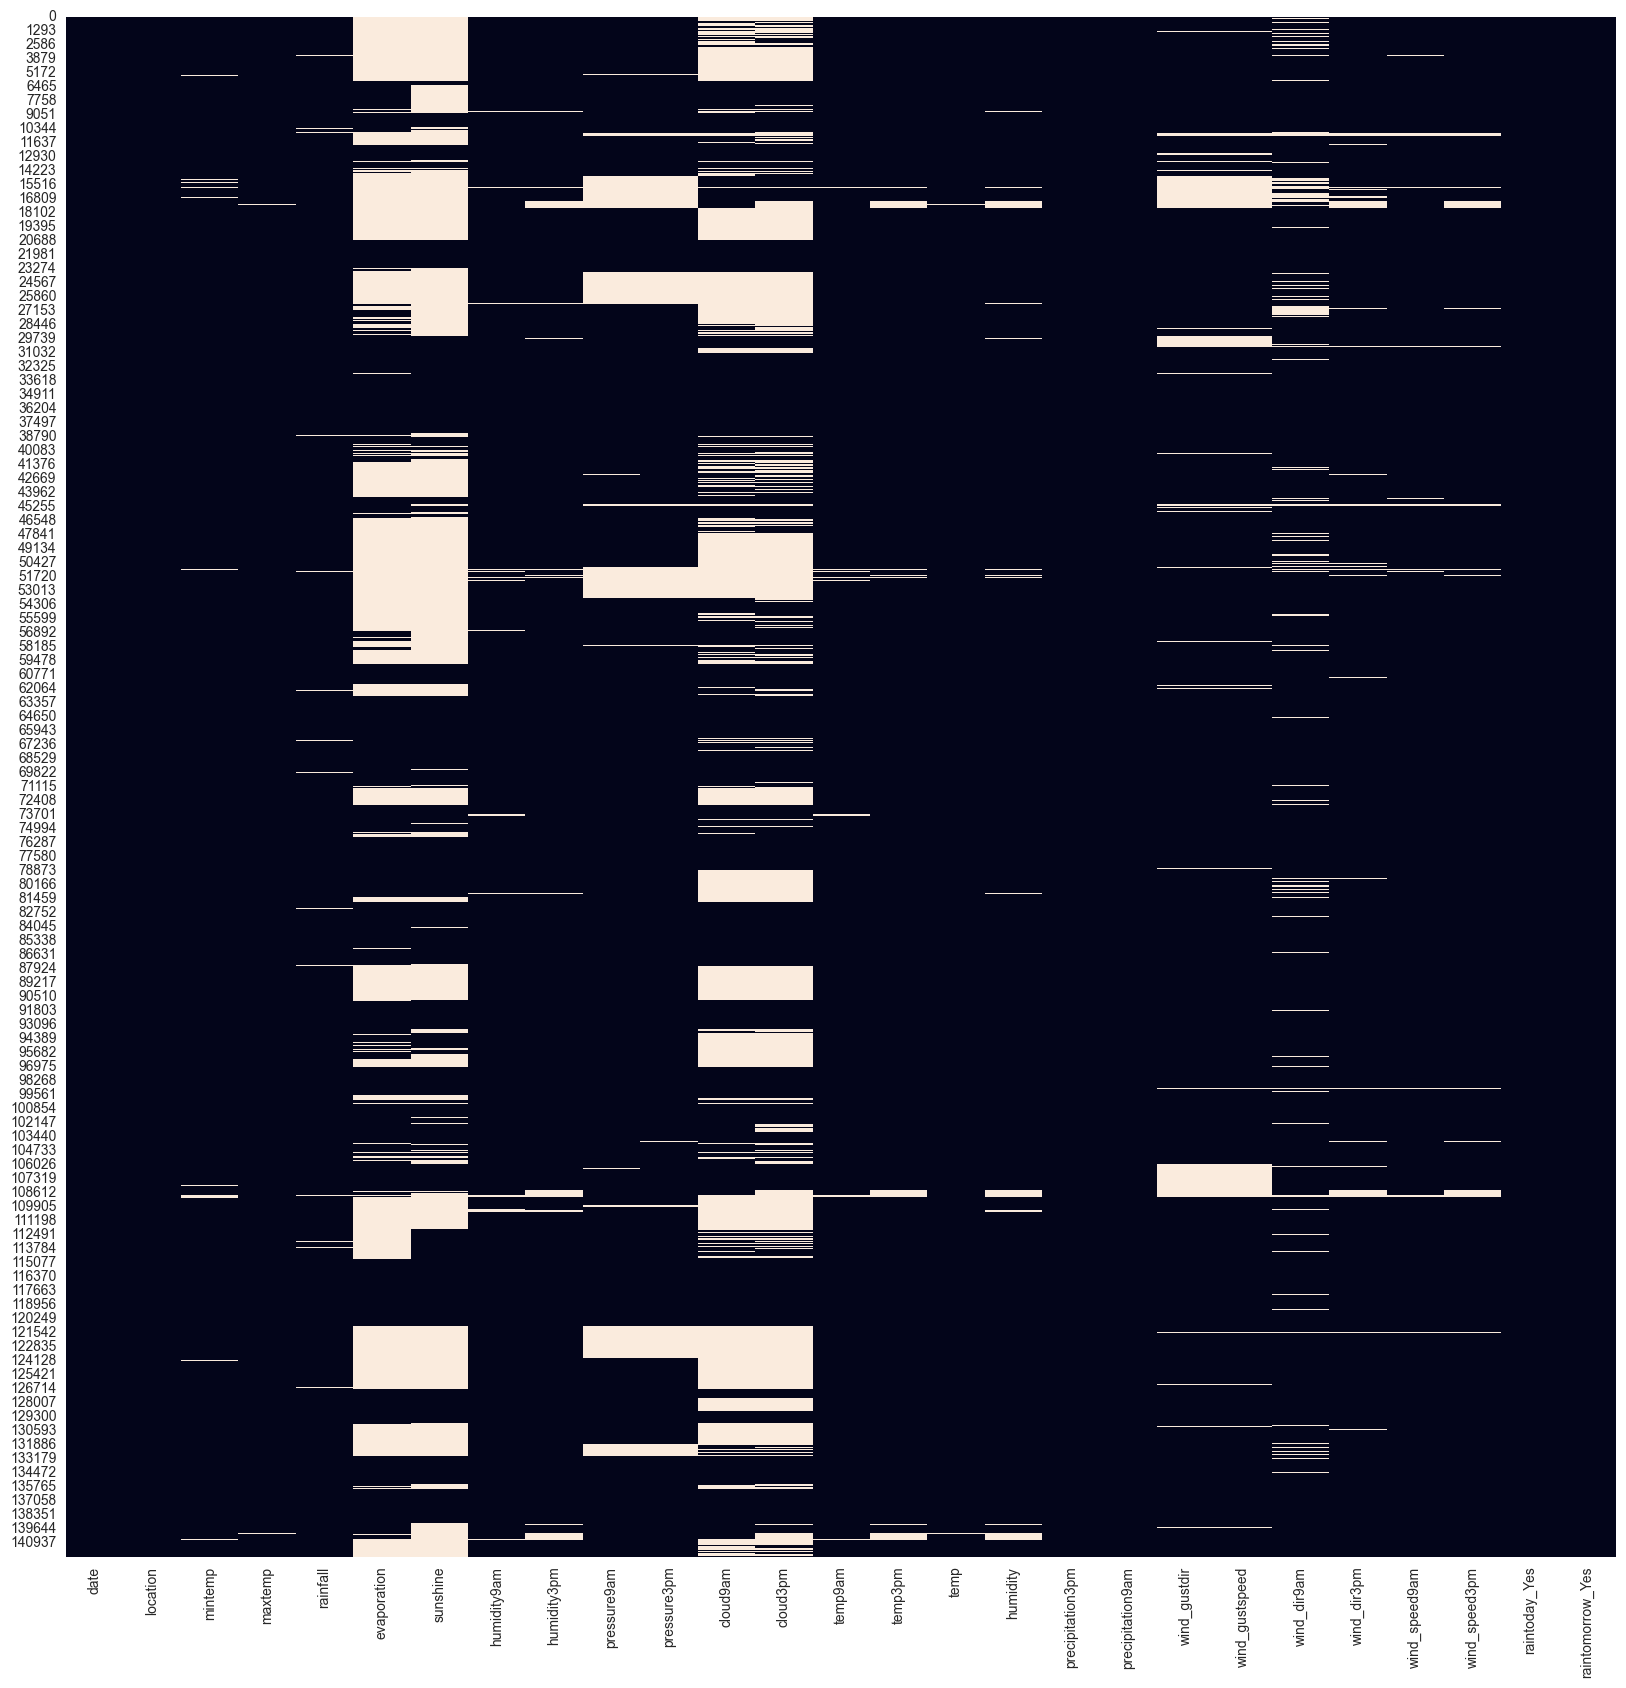

In [27]:
sns.set({'figure.figsize':(20,20)})
sns.heatmap(chuva.isnull(),cbar=False)

### Varíaveis Categóricas - Location

In [28]:
chuva['location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [29]:
sum(chuva[chuva['location'] == 'Sydney']['raintoday_Yes'])

866

In [30]:
dias_chuva = {}

for i in chuva['location'].unique():
    dias_chuva[i] = sum(chuva[chuva['location'] == i]['raintomorrow_Yes'])
dias_chuva

{'Albury': 618,
 'BadgerysCreek': 583,
 'Cobar': 386,
 'CoffsHarbour': 869,
 'Moree': 394,
 'Newcastle': 731,
 'NorahHead': 808,
 'NorfolkIsland': 919,
 'Penrith': 595,
 'Richmond': 560,
 'Sydney': 865,
 'SydneyAirport': 774,
 'WaggaWagga': 536,
 'Williamtown': 700,
 'Wollongong': 713,
 'Canberra': 629,
 'Tuggeranong': 568,
 'MountGinini': 819,
 'Ballarat': 781,
 'Bendigo': 562,
 'Sale': 643,
 'MelbourneAirport': 653,
 'Melbourne': 636,
 'Mildura': 327,
 'Nhil': 242,
 'Portland': 1095,
 'Watsonia': 738,
 'Dartmoor': 922,
 'Brisbane': 709,
 'Cairns': 950,
 'GoldCoast': 775,
 'Townsville': 519,
 'Adelaide': 688,
 'MountGambier': 920,
 'Nuriootpa': 592,
 'Woomera': 202,
 'Albany': 902,
 'Witchcliffe': 879,
 'PearceRAAF': 505,
 'PerthAirport': 567,
 'Perth': 645,
 'SalmonGums': 472,
 'Walpole': 949,
 'Hobart': 761,
 'Launceston': 699,
 'AliceSprings': 244,
 'Darwin': 852,
 'Katherine': 265,
 'Uluru': 116}

In [31]:
cidades = pd.DataFrame.from_dict(data = dias_chuva, orient = 'index', columns = ['dias_chuva'])

In [32]:
cidades.describe()

,dias_chuva
count,49.000000
mean,650.551020
std,219.829011
min,116.000000
25%,560.000000
50%,653.000000
75%,808.000000
max,1095.000000


In [33]:
cidades.sort_values(by = 'dias_chuva',ascending = False)

,dias_chuva
Portland,1095
Cairns,950
Walpole,949
Dartmoor,922
MountGambier,920
NorfolkIsland,919
Albany,902
Witchcliffe,879
CoffsHarbour,869
Sydney,865


In [34]:
cidades_1 = pd.DataFrame(data = chuva['location'].value_counts())
cidades_1

,location
Canberra,3418
Sydney,3337
Perth,3193
Darwin,3192
Hobart,3188
Brisbane,3161
Adelaide,3090
Bendigo,3034
Townsville,3033
AliceSprings,3031


In [35]:
cidades = cidades.merge(cidades_1, left_index = True, right_index = True)

In [36]:
cidades['taxa'] = cidades['dias_chuva'] / cidades['location']

In [37]:
cidades.sort_values(by = 'taxa', ascending = False)

,dias_chuva,location,taxa
Portland,1095,2996,0.365487
Walpole,949,2819,0.336644
Cairns,950,2988,0.317938
Dartmoor,922,2943,0.313286
NorfolkIsland,919,2964,0.310054
MountGambier,920,3030,0.303630
Albany,902,3016,0.299072
Witchcliffe,879,2952,0.297764
CoffsHarbour,869,2953,0.294277
MountGinini,819,2907,0.281734


In [38]:
cidades.describe()

,dias_chuva,location,taxa
count,49.000000,49.000000,49.000000
mean,650.551020,2901.897959,0.221892
std,219.829011,380.385673,0.067951
min,116.000000,1521.000000,0.067559
25%,560.000000,2951.000000,0.184026
50%,653.000000,2990.000000,0.222654
75%,808.000000,3028.000000,0.266917
max,1095.000000,3418.000000,0.365487


In [39]:
grupo_1 = cidades.loc[cidades['taxa'] < 0.11]
grupo_2 = cidades.loc[(cidades['taxa'] > 0.11) & (cidades['taxa'] < 0.15214)]
grupo_3 = cidades.loc[(cidades['taxa'] > 0.15214) & (cidades['taxa'] < 0.19471)]
grupo_4 = cidades.loc[(cidades['taxa'] > 0.19471) & (cidades['taxa'] < 0.23728)]
grupo_5 = cidades.loc[(cidades['taxa'] > 0.23728) & (cidades['taxa'] < 0.27986)]
grupo_6 = cidades.loc[(cidades['taxa'] > 0.27986) & (cidades['taxa'] < 0.32242)]
grupo_7 = cidades.loc[cidades['taxa'] > 0.32242]

In [40]:
cidades.loc[cidades['taxa'] < 0.11, 'grupo'] = 1
cidades.loc[(cidades['taxa'] > 0.11) & (cidades['taxa'] < 0.15214), 'grupo'] = 2
cidades.loc[(cidades['taxa'] > 0.15214) & (cidades['taxa'] < 0.19471), 'grupo'] = 3
cidades.loc[(cidades['taxa'] > 0.19471) & (cidades['taxa'] < 0.23728), 'grupo'] = 4
cidades.loc[(cidades['taxa'] > 0.23728) & (cidades['taxa'] < 0.27986), 'grupo'] = 5
cidades.loc[(cidades['taxa'] > 0.27986) & (cidades['taxa'] < 0.32242), 'grupo'] = 6
cidades.loc[cidades['taxa'] > 0.32242, 'grupo'] = 7

In [41]:
cidades['grupo'].to_dict()

{'Albury': 4.0,
 'BadgerysCreek': 4.0,
 'Cobar': 2.0,
 'CoffsHarbour': 6.0,
 'Moree': 2.0,
 'Newcastle': 5.0,
 'NorahHead': 5.0,
 'NorfolkIsland': 6.0,
 'Penrith': 4.0,
 'Richmond': 3.0,
 'Sydney': 5.0,
 'SydneyAirport': 5.0,
 'WaggaWagga': 3.0,
 'Williamtown': 5.0,
 'Wollongong': 5.0,
 'Canberra': 3.0,
 'Tuggeranong': 3.0,
 'MountGinini': 6.0,
 'Ballarat': 5.0,
 'Bendigo': 3.0,
 'Sale': 4.0,
 'MelbourneAirport': 4.0,
 'Melbourne': 5.0,
 'Mildura': 1.0,
 'Nhil': 3.0,
 'Portland': 7.0,
 'Watsonia': 5.0,
 'Dartmoor': 6.0,
 'Brisbane': 4.0,
 'Cairns': 6.0,
 'GoldCoast': 5.0,
 'Townsville': 3.0,
 'Adelaide': 4.0,
 'MountGambier': 6.0,
 'Nuriootpa': 4.0,
 'Woomera': 1.0,
 'Albany': 6.0,
 'Witchcliffe': 6.0,
 'PearceRAAF': 3.0,
 'PerthAirport': 3.0,
 'Perth': 4.0,
 'SalmonGums': 3.0,
 'Walpole': 7.0,
 'Hobart': 5.0,
 'Launceston': 4.0,
 'AliceSprings': 1.0,
 'Darwin': 5.0,
 'Katherine': 3.0,
 'Uluru': 1.0}

In [42]:
chuva['group_city'] = chuva['location'].map(cidades['grupo'].to_dict())

### Variável categoria - Estação

In [43]:
chuva['date'] = pd.to_datetime(chuva['date'])

In [44]:
chuva['month'] = chuva['date'].dt.month

In [45]:
chuva.loc[chuva['month'] > 10 , 'estacao'] = 0
chuva.loc[chuva['month'] < 5 , 'estacao'] = 0
chuva.loc[(chuva['month'] < 11) & (chuva['month'] > 4), 'estacao'] = 1

In [46]:
chuva.corr()['raintomorrow_Yes'].sort_values(ascending = False)

/var/folders/4x/z7f3ppt51xv6ltctr39t5prh0000gn/T/ipykernel_55075/294739921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  chuva.corr()['raintomorrow_Yes'].sort_values(ascending = False)


raintomorrow_Yes    1.000000
humidity3pm         0.446160
humidity            0.405600
cloud3pm            0.381870
cloud9am            0.317380
raintoday_Yes       0.306555
humidity9am         0.257161
rainfall            0.239032
wind_gustspeed      0.234010
group_city          0.155096
wind_speed9am       0.090995
wind_speed3pm       0.087817
mintemp             0.083936
estacao             0.036122
month               0.007328
precipitation3pm    0.004503
precipitation9am   -0.007018
temp9am            -0.025691
evaporation        -0.119285
temp               -0.125976
maxtemp            -0.159237
temp3pm            -0.192424
pressure3pm        -0.226031
pressure9am        -0.246371
sunshine           -0.450768
Name: raintomorrow_Yes, dtype: float64

## Limpeza de dados - De acordo com a Correlação

In [47]:
chuva.dropna(axis=0, subset = ['humidity', 'humidity3pm'], inplace = True)

In [48]:
chuva.shape

(138583, 30)

In [49]:
chuva.dropna(axis=0, subset = ['humidity9am', 'rainfall'], inplace = True)

In [50]:
chuva.shape

(136768, 30)

In [51]:
chuva.dropna(axis=0, subset = ['wind_gustspeed'], inplace = True)

In [52]:
chuva.shape

(129457, 30)

## Exclusão de colunas

In [81]:
X_train.var()

humidity          709.746003
humidity3pm       434.462688
raintoday_Yes       0.171822
humidity9am       370.815637
rainfall           69.847554
wind_gustspeed    184.231443
group_city          2.309486
dtype: float64

In [83]:
selector = RFECV_SKLEARN(logistic, scoring = 'roc_auc')

In [84]:
selector.fit(X_std_train, y_train)

RFECV(estimator=LogisticRegression(), scoring='roc_auc')

In [85]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1])

In [86]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [87]:
X_train.columns[selector.support_]

Index(['humidity', 'humidity3pm', 'raintoday_Yes', 'humidity9am', 'rainfall',
       'wind_gustspeed', 'group_city'],
      dtype='object')

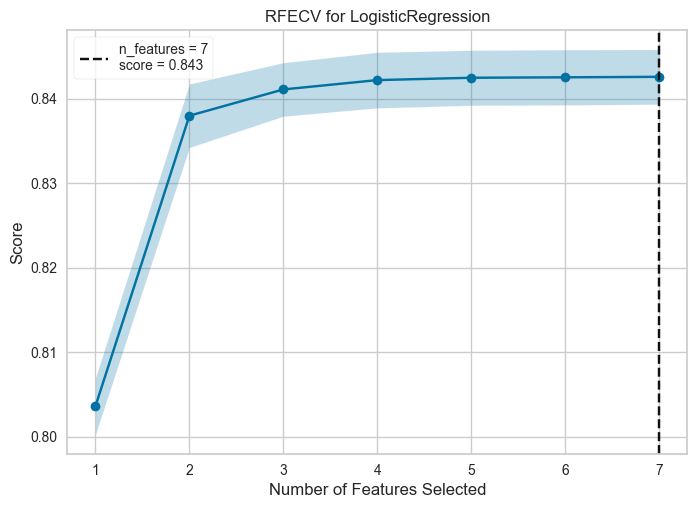

In [91]:
visualizer = RFECV(logistic, scoring = 'roc_auc')

visualizer.fit(X_std_train, y_train)
visualizer.show();

In [92]:
logistic.coef_

array([[-0.02173076,  1.40759857,  0.19207846,  0.03305259,  0.09306443,
         0.64796781, -0.18371049]])

## Modelo Preditivo

### Regressão Logística

In [53]:
scaler = StandardScaler()

In [54]:
logistic = LogisticRegression()

In [55]:
X = chuva[['humidity', 'humidity3pm', 'raintoday_Yes', 'humidity9am', 'rainfall', 'wind_gustspeed', 'group_city']]
y = chuva['raintomorrow_Yes']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler.fit(X_train)

StandardScaler()

In [58]:
X_std_train = scaler.transform(X_train)
X_std_test = scaler.transform(X_test)

In [59]:
logistic.fit(X_std_train,y_train)

LogisticRegression()

In [60]:
logistic.predict(X_std_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Métricas de avaliação - Regressão Logística

In [61]:
logistic.score(X_std_train, y_train)

0.8425819533626225

In [62]:
precision_score(y_test, logistic.predict(X_std_test))

0.7248454187745925

In [63]:
recall_score(y_test, logistic.predict(X_std_test))

0.45662181303116145

In [64]:
f1_score(y_test, logistic.predict(X_std_test))

0.5602867694981534

In [65]:
logistic.score(X_std_test, y_test)

0.8436582728255831

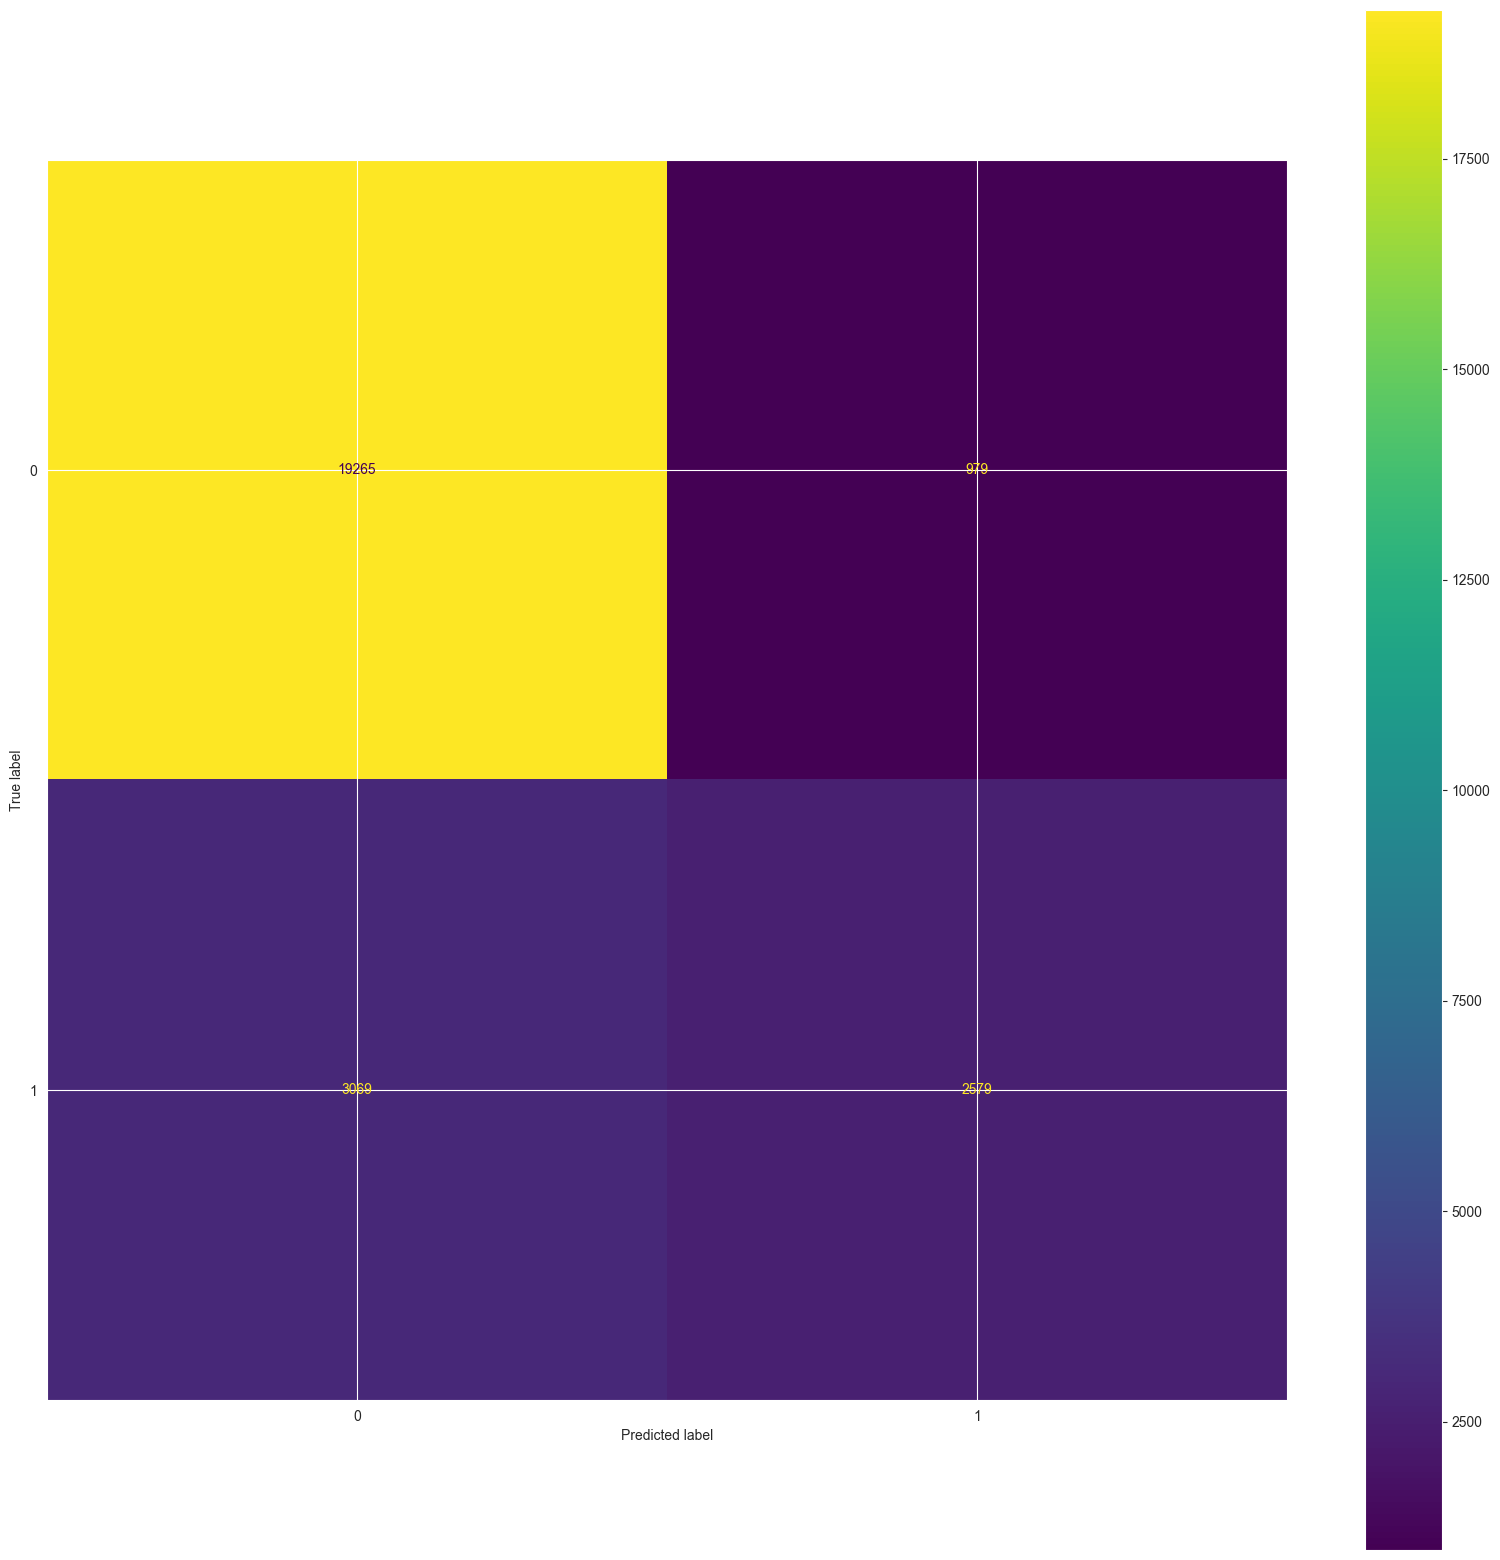

In [66]:
ConfusionMatrixDisplay(confusion_matrix(y_test, logistic.predict(X_std_test))).plot()

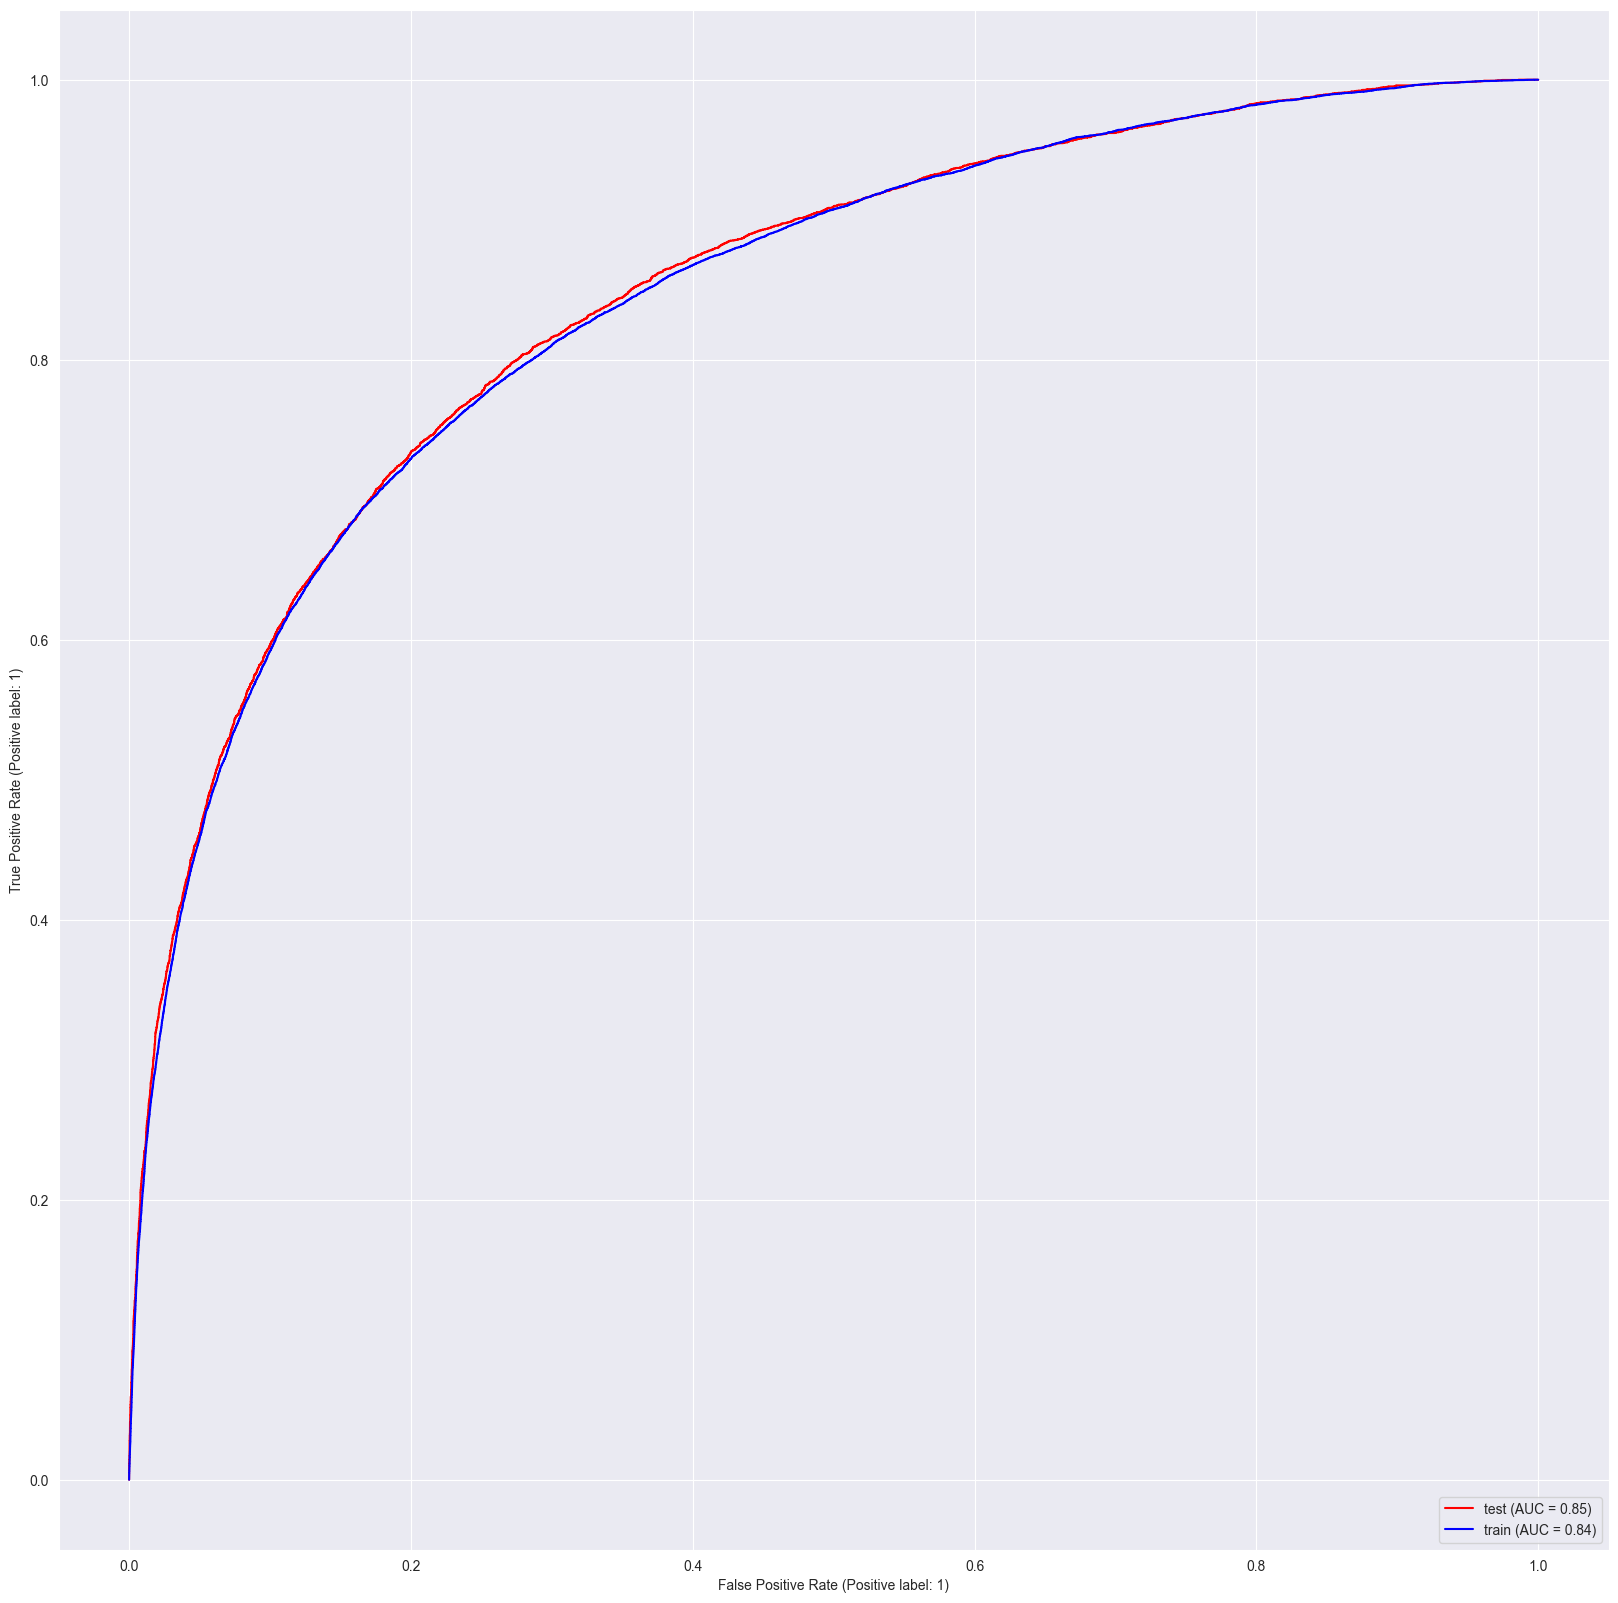

In [67]:
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(logistic,X_std_test, y_test, color='red', ax= ax, name='test')
RocCurveDisplay.from_estimator(logistic, X_std_train, y_train, color='blue', ax=ax, name='train')

### Regressão Logística - Sunshine

In [68]:
logistic_s = LogisticRegression()

In [69]:
scaler_s = StandardScaler()

In [70]:
X_1 = df_nulo_sunshine[['humidity', 'humidity3pm', 'raintoday_Yes', 'humidity9am', 'rainfall', 'sunshine', 'temp3pm', 'temp9am']]
y_1 = df_nulo_sunshine['raintomorrow_Yes']

NameError: name 'df_nulo_sunshine' is not defined

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

In [ ]:
scaler.fit(X_train_s)

In [ ]:
X_std_train_s = scaler.transform(X_train_s)
X_std_test_s = scaler.transform(X_test_s)

In [ ]:
logistic.fit(X_std_train_s,y_train_s)

In [ ]:
logistic.predict(X_std_test_s)

In [ ]:
logistic.score(X_std_train_s, y_train_s)

In [ ]:
logistic.score(X_std_test_s, y_test_s)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test_s, logistic.predict(X_std_test_s))).plot()

### Regressão Logística - Grupos Cidades

In [71]:
X_1 = chuva.loc[chuva['group_city'] == 1, ['humidity', 'humidity3pm', 'humidity9am', 'rainfall', 'raintoday_Yes', 'wind_gustspeed', 'estacao']]
X_2 = chuva.loc[chuva['group_city'] == 2, ['humidity', 'humidity3pm', 'humidity9am', 'rainfall', 'raintoday_Yes', 'wind_gustspeed', 'estacao']]
X_3 = chuva.loc[chuva['group_city'] == 3, ['humidity', 'humidity3pm', 'humidity9am', 'rainfall', 'raintoday_Yes', 'wind_gustspeed', 'estacao']]
X_4 = chuva.loc[chuva['group_city'] == 4, ['humidity', 'humidity3pm', 'humidity9am', 'rainfall', 'raintoday_Yes', 'wind_gustspeed', 'estacao']]
X_5 = chuva.loc[chuva['group_city'] == 5, ['humidity', 'humidity3pm', 'humidity9am', 'rainfall', 'raintoday_Yes', 'wind_gustspeed', 'estacao']]
X_6 = chuva.loc[chuva['group_city'] == 6, ['humidity', 'humidity3pm', 'humidity9am', 'rainfall', 'raintoday_Yes', 'wind_gustspeed', 'estacao']]
X_7 = chuva.loc[chuva['group_city'] == 7, ['humidity', 'humidity3pm', 'humidity9am', 'rainfall', 'raintoday_Yes', 'wind_gustspeed', 'estacao']]

In [ ]:
y_1 = chuva.loc[chuva['group_city'] == 1, 'raintomorrow_Yes']
y_2 = chuva.loc[chuva['group_city'] == 2, 'raintomorrow_Yes']
y_3 = chuva.loc[chuva['group_city'] == 3, 'raintomorrow_Yes']
y_4 = chuva.loc[chuva['group_city'] == 4, 'raintomorrow_Yes']
y_5 = chuva.loc[chuva['group_city'] == 5, 'raintomorrow_Yes']
y_6 = chuva.loc[chuva['group_city'] == 6, 'raintomorrow_Yes']
y_7 = chuva.loc[chuva['group_city'] == 7, 'raintomorrow_Yes']

In [ ]:
logistic_1 = LogisticRegression()
logistic_2 = LogisticRegression()
logistic_3 = LogisticRegression()
logistic_4 = LogisticRegression()
logistic_5 = LogisticRegression()
logistic_6 = LogisticRegression()
logistic_7 = LogisticRegression()

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.2, random_state=42)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.2, random_state=42)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X_7, y_7, test_size=0.2, random_state=42)

In [ ]:
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
scaler_3 = StandardScaler()
scaler_4 = StandardScaler()
scaler_5 = StandardScaler()
scaler_6 = StandardScaler()
scaler_7 = StandardScaler()

In [ ]:
scaler_1.fit(X_train_1)
scaler_2.fit(X_train_2)
scaler_3.fit(X_train_3)
scaler_4.fit(X_train_4)
scaler_5.fit(X_train_5)
scaler_6.fit(X_train_6)
scaler_7.fit(X_train_7)

In [ ]:
X_std_train_1 = scaler_1.transform(X_train_1)
X_std_train_2 = scaler_2.transform(X_train_2)
X_std_train_3 = scaler_3.transform(X_train_3)
X_std_train_4 = scaler_4.transform(X_train_4)
X_std_train_5 = scaler_5.transform(X_train_5)
X_std_train_6 = scaler_6.transform(X_train_6)
X_std_train_7 = scaler_7.transform(X_train_7)

In [ ]:
X_std_test_1 = scaler_1.transform(X_test_1)
X_std_test_2 = scaler_2.transform(X_test_2)
X_std_test_3 = scaler_3.transform(X_test_3)
X_std_test_4 = scaler_4.transform(X_test_4)
X_std_test_5 = scaler_5.transform(X_test_5)
X_std_test_6 = scaler_6.transform(X_test_6)
X_std_test_7 = scaler_7.transform(X_test_7)

In [ ]:
logistic_1.fit(X_std_train_1,y_train_1)
logistic_2.fit(X_std_train_2,y_train_2)
logistic_3.fit(X_std_train_3,y_train_3)
logistic_4.fit(X_std_train_4,y_train_4)
logistic_5.fit(X_std_train_5,y_train_5)
logistic_6.fit(X_std_train_6,y_train_6)
logistic_7.fit(X_std_train_7,y_train_7)

In [ ]:
logistic_1.predict(X_std_test_1)
logistic_2.predict(X_std_test_2)
logistic_3.predict(X_std_test_3)
logistic_4.predict(X_std_test_4)
logistic_5.predict(X_std_test_5)
logistic_6.predict(X_std_test_6)
logistic_7.predict(X_std_test_7)

In [ ]:
def modelos_grupo(linha, logistic_1, logistic_2, logistic_3, logistic_4, logistic_5, logistic_6, logistic_7, scaler_1, scaler_2, scaler_3, scaler_4, scaler_5, scaler_6, scaler_7):
    logistic = (pd.DataFrame(linha[['humidity', 'humidity3pm', 'humidity9am', 'rainfall', 'raintoday_Yes','wind_gustspeed', 'estacao' ]]).T)
    if linha['group_city'] == 1:
        logistic=scaler_1.transform(logistic)
        return logistic_1.predict_proba(logistic)[:, 1]
    elif linha['group_city'] == 2:
        logistic=scaler_2.transform(logistic)
        return logistic_2.predict_proba(logistic)[:, 1]
    elif linha['group_city'] == 3:
        logistic=scaler_3.transform(logistic)
        return logistic_3.predict_proba(logistic)[:, 1]
    elif linha['group_city'] == 4:
        logistic=scaler_4.transform(logistic)
        return logistic_4.predict_proba(logistic)[:, 1]
    elif linha['group_city'] == 5:
        logistic=scaler_5.transform(logistic)
        return logistic_5.predict_proba(logistic)[:, 1]
    elif linha['group_city'] == 6:
        logistic=scaler_6.transform(logistic)
        return logistic_6.predict_proba(logistic)[:, 1]
    else:
        logistic=scaler_7.transform(logistic)
        return logistic_7.predict_proba(logistic)[:, 1]

In [ ]:
chuva['modelo_rl'] = chuva.apply(modelos_grupo, axis=1, logistic_1=logistic_1, logistic_2=logistic_2, logistic_3=logistic_3, logistic_4=logistic_4, logistic_5=logistic_5, logistic_6=logistic_6, logistic_7=logistic_7, scaler_1=scaler_1, scaler_2=scaler_2, scaler_3=scaler_3, scaler_4=scaler_4, scaler_5=scaler_5, scaler_6=scaler_6, scaler_7=scaler_7)

In [ ]:
fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(logistic,X_std_test, y_test, color='red', ax= ax, name='test')
RocCurveDisplay.from_estimator(logistic, X_std_train, y_train, color='blue', ax=ax, name='train')
RocCurveDisplay.from_predictions(chuva['raintomorrow_Yes'], chuva['modelo_rl'].str[0], ax=ax, name='group_model')


In [ ]:
fig, ax = plt.subplots()


RocCurveDisplay.from_estimator(logistic, X_std_test, y_test, name='R.L Sem Grupo', ax=ax)
RocCurveDisplay.from_estimator(logistic_1, X_std_test_1, y_test_1, name='R.L Group 1', ax=ax)
RocCurveDisplay.from_estimator(logistic_2, X_std_test_2, y_test_2, name='R.L Group 2', ax=ax)
RocCurveDisplay.from_estimator(logistic_3, X_std_test_3, y_test_3, name='R.L Group 3', ax=ax)
RocCurveDisplay.from_estimator(logistic_4, X_std_test_4, y_test_4, name='R.L Group 4', ax=ax)
RocCurveDisplay.from_estimator(logistic_5, X_std_test_5, y_test_5, name='R.L Group 5', ax=ax)
RocCurveDisplay.from_estimator(logistic_6, X_std_test_6, y_test_6, name='R.L Group 6', ax=ax)
RocCurveDisplay.from_estimator(logistic_7, X_std_test_7, y_test_7, name='R.L Group 7', ax=ax)

plt.legend()

### Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
forest = RandomForestClassifier(max_depth=2, n_estimators=20, n_jobs=3, random_state=43)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, n_jobs=3, random_state=43)

In [74]:
forest.feature_importances_
pd.DataFrame(zip(forest.feature_importances_, X_train.columns), columns=['importance','variable']).sort_values(by='importance',ascending=False)

,importance,variable
0,0.450519,humidity
1,0.240358,humidity3pm
4,0.148121,rainfall
2,0.083281,raintoday_Yes
5,0.044122,wind_gustspeed
3,0.032552,humidity9am
6,0.001046,group_city


In [75]:
forest.score(X_train, y_train)

0.8295466615169217

In [76]:
forest.score(X_test, y_test)

0.8320330604047582

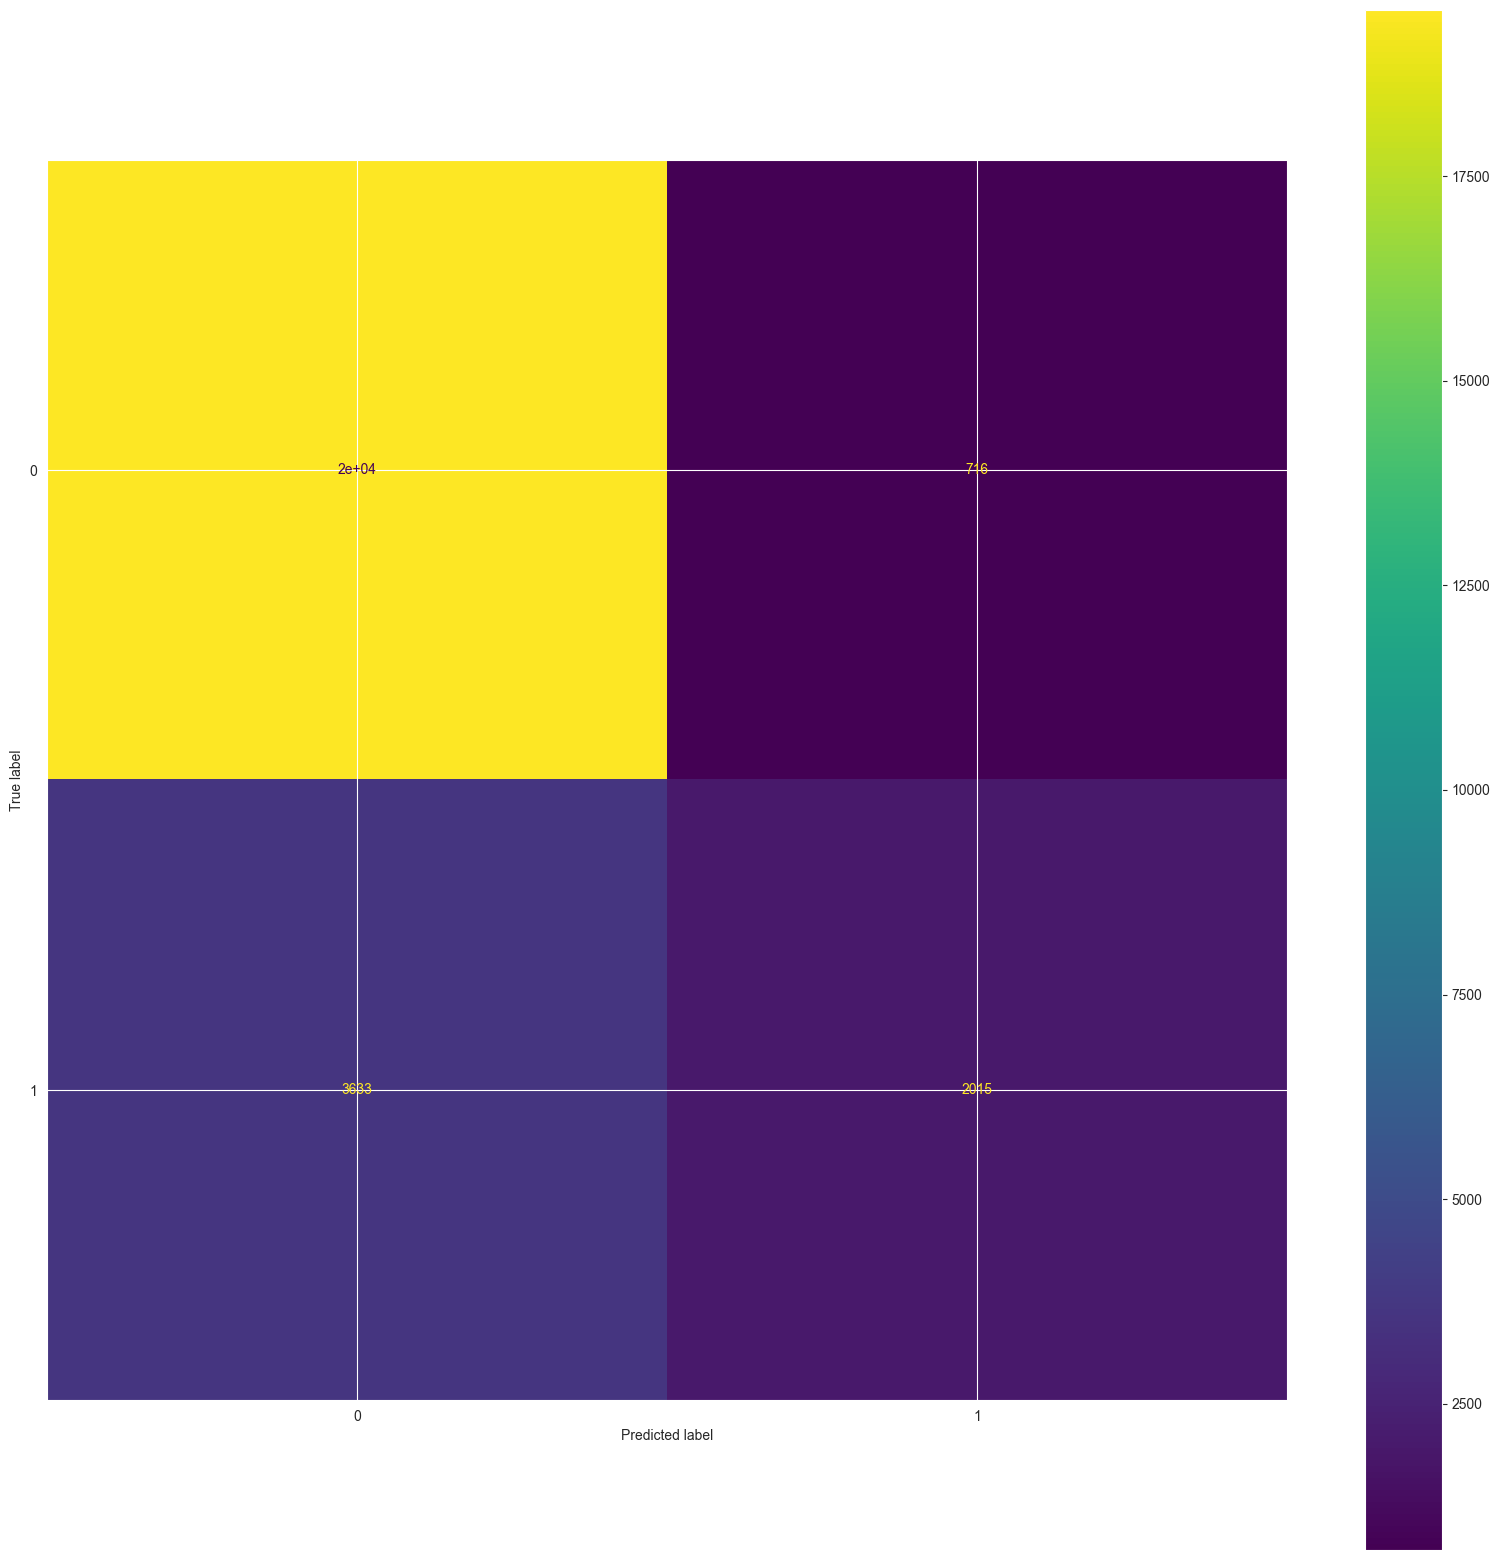

In [77]:
ConfusionMatrixDisplay(confusion_matrix(y_test, forest.predict(X_test))).plot()

### Random Forest - Grupos Cidades